## SLP IMPLEMENTATION

1. Basic SLP

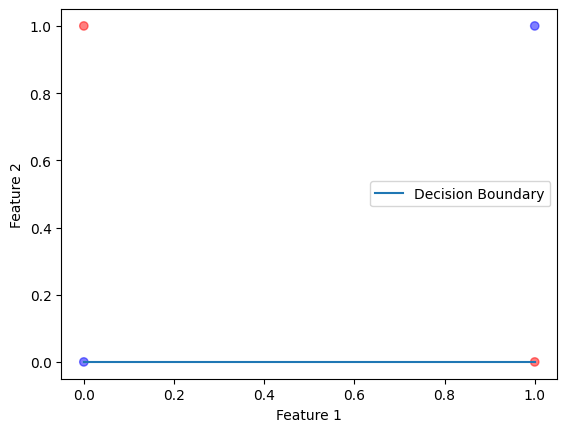

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class BasicSLP:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._step_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_function(linear_output)

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
        x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
        y_values = -(self.weights[0] * x_values + self.bias) / self.weights[1]
        plt.plot(x_values, y_values, label='Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 0])
model = BasicSLP()
model.fit(X, y)
predictions = model.predict(X)
model.plot_decision_boundary(X, y)


2. SLP with Softmax

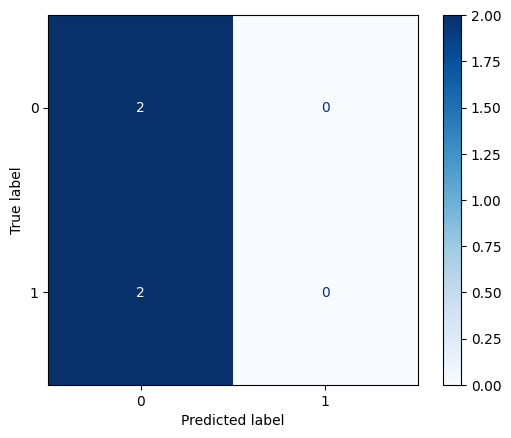

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class SoftmaxSLP:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        for _ in range(self.epochs):
            scores = np.dot(X, self.weights) + self.bias
            probabilities = self._softmax(scores)
            loss = -np.mean(np.log(probabilities[range(len(y)), y]))
            gradient_weights, gradient_bias = self._gradient(X, probabilities, y)
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probabilities = self._softmax(scores)
        return np.argmax(probabilities, axis=1)

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _gradient(self, X, probabilities, y):
        num_samples = X.shape[0]
        y_one_hot = np.zeros_like(probabilities)
        y_one_hot[np.arange(num_samples), y] = 1
        gradient_weights = np.dot(X.T, (probabilities - y_one_hot)) / num_samples
        gradient_bias = np.mean(probabilities - y_one_hot, axis=0)
        return gradient_weights, gradient_bias

    def plot_confusion_matrix(self, X, y):
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
        disp.plot(cmap='Blues')
        plt.show()


X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 0])
model = SoftmaxSLP()
model.fit(X, y)
predictions = model.predict(X)
model.plot_confusion_matrix(X, y)


3. Single Layer Perceptron with Cross-Entropy Loss

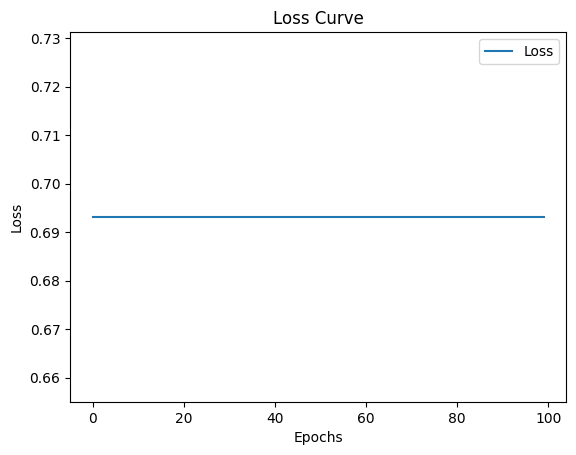

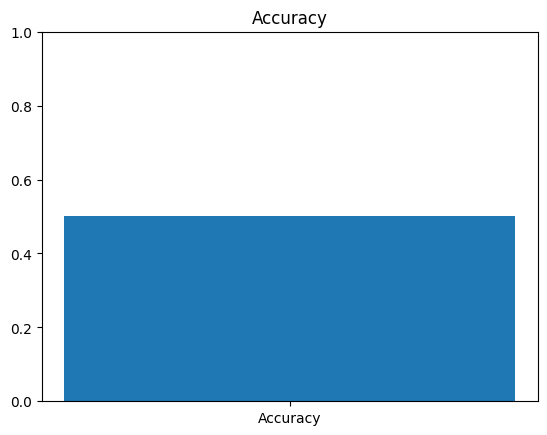

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class SLPWithCrossEntropy:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_output)
            loss = -np.mean(y * np.log(y_predicted + 1e-9) + (1 - y) * np.log(1 - y_predicted + 1e-9))
            self.loss_history.append(loss)
            gradient = np.dot(X.T, (y_predicted - y)) / num_samples
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(y_predicted - y)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def plot_loss_curve(self):
        plt.plot(range(self.epochs), self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()

    def plot_accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        plt.bar(['Accuracy'], [accuracy])
        plt.ylim(0, 1)
        plt.title('Accuracy')
        plt.show()

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 0])
model = SLPWithCrossEntropy()
model.fit(X, y)
model.plot_loss_curve()
model.plot_accuracy(X, y)


4. Single Layer Perceptron with Regularization

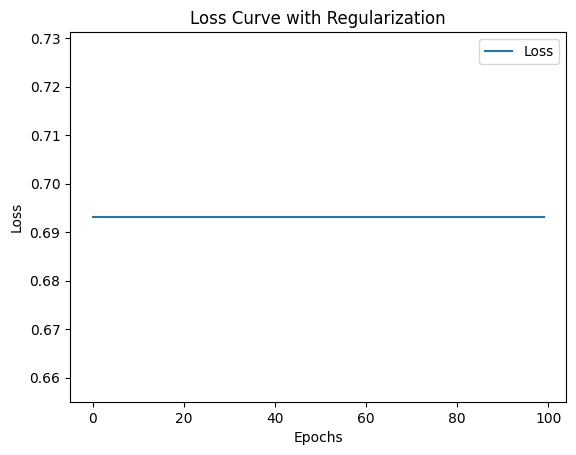

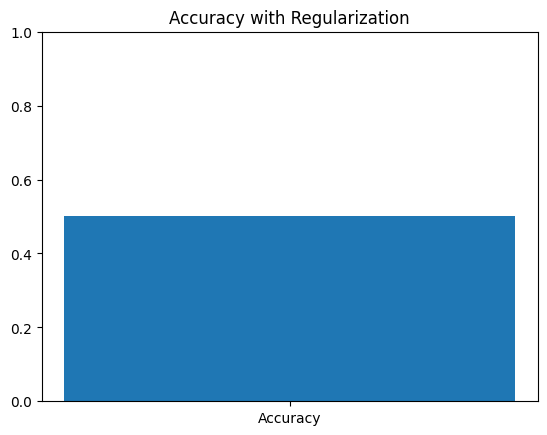

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class SLPWithRegularization:
    def __init__(self, learning_rate=0.01, epochs=100, regularization='L2', lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_output)
            loss = -np.mean(y * np.log(y_predicted + 1e-9) + (1 - y) * np.log(1 - y_predicted + 1e-9))
            if self.regularization == 'L2':
                loss += (self.lambda_reg / 2) * np.sum(self.weights ** 2)
                gradient = np.dot(X.T, (y_predicted - y)) / num_samples + self.lambda_reg * self.weights
            elif self.regularization == 'L1':
                loss += self.lambda_reg * np.sum(np.abs(self.weights))
                gradient = np.dot(X.T, (y_predicted - y)) / num_samples + self.lambda_reg * np.sign(self.weights)
            self.loss_history.append(loss)
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(y_predicted - y)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def plot_loss_curve(self):
        plt.plot(range(self.epochs), self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve with Regularization')
        plt.legend()
        plt.show()

    def plot_accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        plt.bar(['Accuracy'], [accuracy])
        plt.ylim(0, 1)
        plt.title('Accuracy with Regularization')
        plt.show()

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 0])
model = SLPWithRegularization(regularization='L2', lambda_reg=0.01)
model.fit(X, y)
model.plot_loss_curve()
model.plot_accuracy(X, y)


## MLP IMPLEMENTATION

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset from sklearn
iris = load_iris()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2, random_state=42)


# Convert data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

1. Basic Multi-Layer Perceptron (MLP)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.0000e+00 - loss: 2.5414 - val_accuracy: 0.0000e+00 - val_loss: 2.0221
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1119 - loss: 1.9138 - val_accuracy: 0.6000 - val_loss: 1.5592
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4773 - loss: 1.5143 - val_accuracy: 0.3667 - val_loss: 1.2921
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3425 - loss: 1.2680 - val_accuracy: 0.3667 - val_loss: 1.1358
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2990 - loss: 1.1599 - val_accuracy: 0.3667 - val_loss: 1.0273
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3327 - loss: 1.0372 - val_accuracy: 0.5000 - val_loss: 0.9382
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6848 - loss: 0.9352 - val_accuracy: 0.8333 - val_loss: 0.8681
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8279 - loss: 0.8729 - val_accuracy: 0.8667 - val_loss:

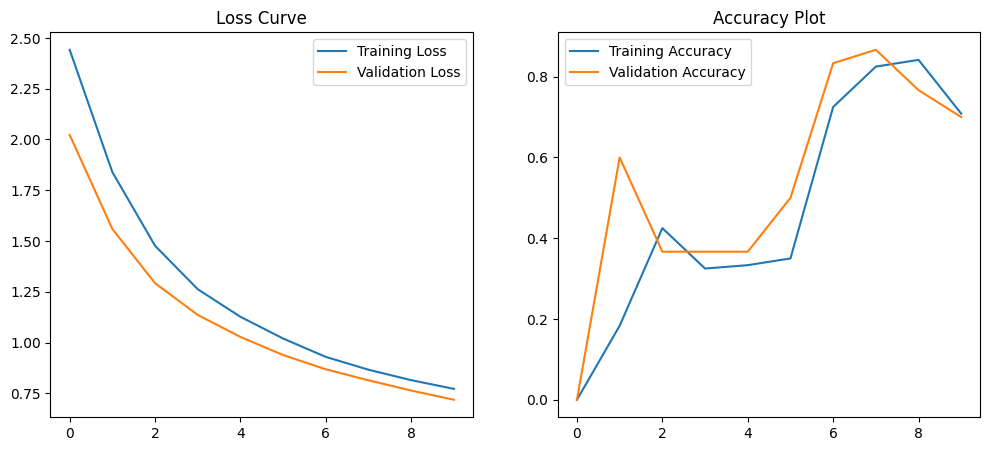

In [8]:
# Define MLP model
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.show()


MLP with Dropout

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.0854 - loss: 3.2912 - val_accuracy: 0.3000 - val_loss: 2.2279
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1923 - loss: 2.7485 - val_accuracy: 0.3000 - val_loss: 1.8350
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1950 - loss: 2.5360 - val_accuracy: 0.5000 - val_loss: 1.5463
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2610 - loss: 2.2503 - val_accuracy: 0.5333 - val_loss: 1.3321
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3552 - loss: 1.7073 - val_accuracy: 0.3667 - val_loss: 1.1849
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4023 - loss: 1.6082 - val_accuracy: 0.4000 - val_loss: 1.0922
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3292 - loss: 1.7973 - val_accuracy: 0.6333 - val_loss: 1.0329
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3194 - loss: 1.5849 - val_accuracy: 0.7000 - val_loss: 0.9877


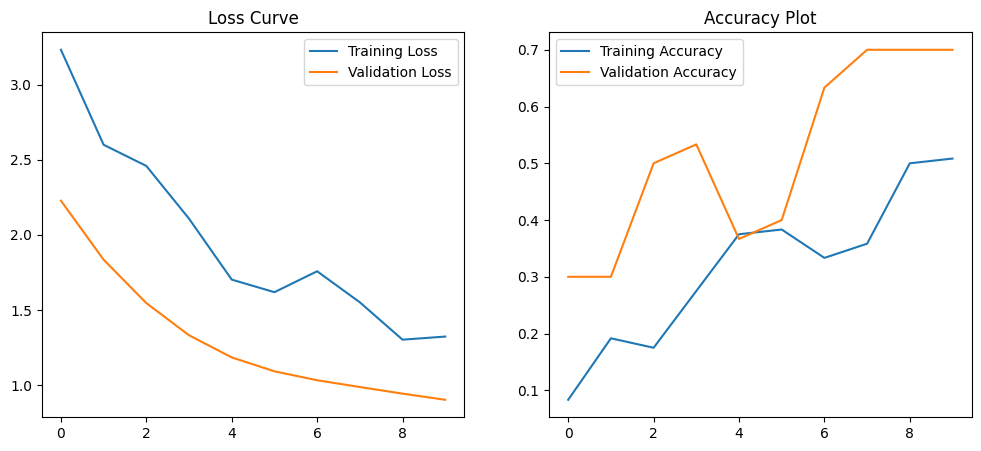

In [9]:
# Define MLP model with Dropout
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.show()


3. MLP with Batch Normalization

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.0054 - loss: 2.7313 - val_accuracy: 0.0000e+00 - val_loss: 2.2909
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1021 - loss: 2.0552 - val_accuracy: 0.0000e+00 - val_loss: 2.1205
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4596 - loss: 1.5023 - val_accuracy: 0.0000e+00 - val_loss: 1.9517
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6260 - loss: 1.2351 - val_accuracy: 0.5667 - val_loss: 1.8174
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8012 - loss: 0.9987 - val_accuracy: 0.7000 - val_loss: 1.7149
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9081 - loss: 0.7474 - val_accuracy: 0.6000 - val_loss: 1.6469
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9292 - loss: 0.6078 - val_accuracy: 0.5333 - val_loss: 1.6045
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9383 - loss: 0.4857 - val_accuracy: 0.6333 - val_l

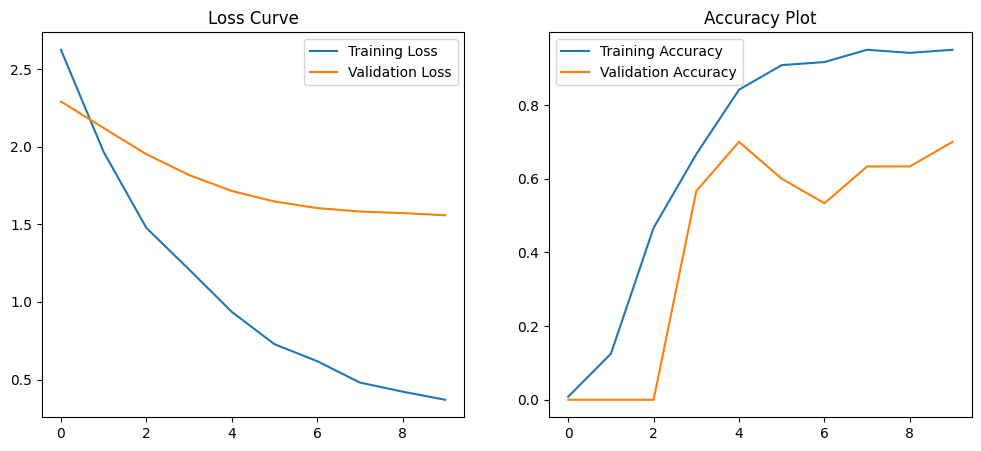

In [10]:
# Define MLP model with Batch Normalization
model = models.Sequential([
    layers.Dense(64, activation=None,),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64, activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.show()


4. MLP with Different Activation Functions

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3648 - loss: 2.3093 - val_accuracy: 0.3000 - val_loss: 2.0139
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3075 - loss: 1.9105 - val_accuracy: 0.3000 - val_loss: 1.6061
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3867 - loss: 1.4949 - val_accuracy: 0.5667 - val_loss: 1.3734
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5227 - loss: 1.3124 - val_accuracy: 0.3333 - val_loss: 1.2453
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4208 - loss: 1.2258 - val_accuracy: 0.3667 - val_loss: 1.1767
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3665 - loss: 1.1779 - val_accuracy: 0.3667 - val_loss: 1.1364
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3479 - loss: 1.1327 - val_accuracy: 0.4000 - val_loss: 1.1120
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5863 - loss: 1.1050 - val_accuracy: 0.4333 - val_loss: 1.0976

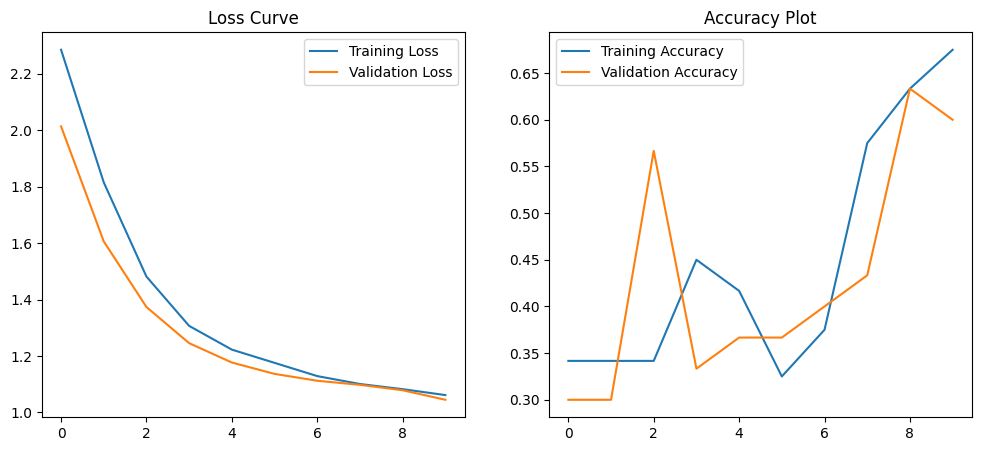

In [11]:
# Define MLP model with different activation functions
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot activation function effects
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.show()


5. MLP with Custom Loss Functions

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6271 - loss: 0.1950 - val_accuracy: 0.7000 - val_loss: 0.1711
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.1733 - val_accuracy: 0.7000 - val_loss: 0.1526
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6531 - loss: 0.1530 - val_accuracy: 0.7333 - val_loss: 0.1378
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6883 - loss: 0.1387 - val_accuracy: 0.7667 - val_loss: 0.1255
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7713 - loss: 0.1246 - val_accuracy: 0.8333 - val_loss: 0.1173
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8762 - loss: 0.1173 - val_accuracy: 0.9000 - val_loss: 0.1098
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9062 - loss: 0.1136 - val_accuracy: 0.9333 - val_loss: 0.1034
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9200 - loss: 0.1095 - val_accuracy: 0.9667 - val_loss: 0.0980

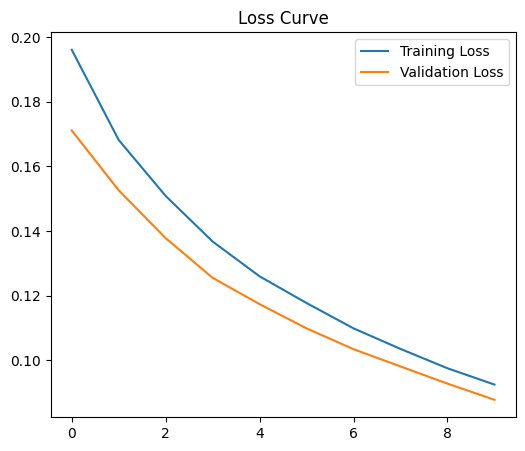

In [13]:
# Define custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))  # Example: Mean Squared Error

# Define MLP model
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')  # Adjust output size
])

# Compile model with custom loss function
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot loss curve
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


6. Convolutional Neural Network (CNN) as MLP

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8982 - loss: 0.3332 - val_accuracy: 0.9855 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9880 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9891 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9939 - loss: 0.0175 - val_accuracy: 0.9914 - val_loss: 0.0274


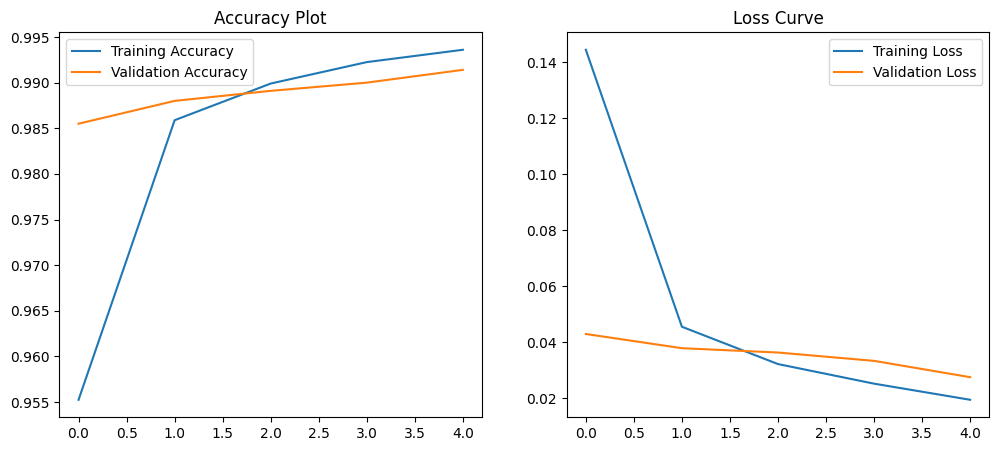

In [15]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot feature maps and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()
